In [47]:
pwd

'C:\\Users\\sm_fe\\Google Drive\\Project 2'

### Link to the folder on Google Drive containing all analysis:
https://drive.google.com/drive/folders/1JpgXFBv_Aea01sGxWOGbQLVKJkWSBFKi?usp=sharing

### link directly to the write up:
https://docs.google.com/document/d/1CB9SenavvaYQF-jSgpW3mJaz6oLNWH6ddSpl8McpkCI/edit?usp=sharing

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import re
import pycountry as pc
from matplotlib.ticker import PercentFormatter
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

#Create date parser to pass to read_csv
d = lambda x: datetime.datetime.fromtimestamp(int(x))
date_cols = ['created_at','deadline','launched_at','state_changed_at']
df = pd.read_csv('merged.csv', engine = 'python', parse_dates = date_cols, date_parser = d)
df.head()

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,fx_rate,goal,id,is_starrable,launched_at,name,photo,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type,location,friends,is_backing,is_starred,permissions
0,80,"I will be an artist-in-residence at Elsewhere Studios this summer, where I will stretch my wings and see where I land!","{""urls"":{""web"":{""discover"":""http://www.kickstarter.com/discover/categories/art/mixed%20media""}},""color"":16760235,""parent_id"":1,""name"":""Mixed Media"",""id"":54,""position"":6,""slug"":""art/mixed media""}",3596,US,2012-01-07 20:55:05,"{""urls"":{""web"":{""user"":""https://www.kickstarter.com/profile/hilaryemersonlay""},""api"":{""user"":""https://api.kickstarter.com/v1/users/483835381?signature=1518794258.f01f6dbe22f25adbfb1a0b9bf0637e8e49e1f0f6""}},""is_registered"":true,""chosen_currency"":null,""name"":""Hilary Emerson Lay"",""id"":483835381,""avatar"":{""small"":""https://ksr-ugc.imgix.net/assets/006/295/961/cda3a0d11906c53f2e69bbfa51ec9700_original.jpg?w=160&h=160&fit=crop&v=1461379194&auto=format&q=92&s=57d3cf86b953b13877053a9eb0b7a3f2"",""thumb"":""https://ksr-ugc.imgix.net/assets/006/295/961/cda3a0d11906c53f2e69bbfa51ec9700_original.jpg?w=40&h=40&fit=crop&v=1461379194&auto=format&q=92&s=c82e792178047287b48a37d06ac26466"",""medium"":""https://ksr-ugc.imgix.net/assets/006/295/961/cda3a0d11906c53f2e69bbfa51ec9700_original.jpg?w=160&h=160&fit=crop&v=1461379194&auto=format&q=92&s=57d3cf86b953b13877053a9eb0b7a3f2""},""slug"":""hilaryemersonlay""}",USD,$,True,USD,2012-04-19 17:16:00,False,1.00,"2,800.00",1562040083,False,2012-03-28 18:14:20,Elsewhere Studios artist-in-residency program!,"{""small"":""https://ksr-ugc.imgix.net/assets/011/311/400/cda3a0d11906c53f2e69bbfa51ec9700_original.jpg?crop=faces&w=160&h=90&fit=crop&v=1463680809&auto=format&q=92&s=bfbc30ad8a4c7082b6293519f9c436ab"",""thumb"":""https://ksr-ugc.imgix.net/assets/011/311/400/cda3a0d11906c53f2e69bbfa51ec9700_original.jpg?crop=faces&w=48&h=27&fit=crop&v=1463680809&auto=format&q=92&s=8a3c0883a3f386bd1e9be12a158e5368"",""1024x576"":""https://ksr-ugc.imgix.net/assets/011/311/400/cda3a0d11906c53f2e69bbfa51ec9700_original.jpg?crop=faces&w=1024&h=576&fit=crop&v=1463680809&auto=format&q=92&s=7e1a9ded6a91f25ffb69652c20b17633"",""med"":""https://ksr-ugc.imgix.net/assets/011/311/400/cda3a0d11906c53f2e69bbfa51ec9700_original.jpg?crop=faces&w=272&h=153&fit=crop&v=1463680809&auto=format&q=92&s=77ca95158c27de0e31c3c931ab6dc55a"",""key"":""assets/011/311/400/cda3a0d11906c53f2e69bbfa51ec9700_original.jpg"",""1536x864"":""https://ksr-ugc.imgix.net/assets/011/311/400/cda3a0d11906c53f2e69bbfa51ec9700_original.jpg?crop=faces&w=1552&h=873&fit=crop&v=1463680809&auto=format&q=92&s=e849392efcd453bd180efafa5c8e7fb7"",""ed"":""https://ksr-ugc.imgix.net/assets/011/311/400/cda3a0d11906c53f2e69bbfa51ec9700_original.jpg?crop=faces&w=352&h=198&fit=crop&v=1463680809&auto=format&q=92&s=826fac0fbc596ab0b0241bf7f56860bc"",""full"":""https://ksr-ugc.imgix.net/assets/011/311/400/cda3a0d11906c53f2e69bbfa51ec9700_original.jpg?crop=faces&w=560&h=315&fit=crop&v=1463680809&auto=format&q=92&s=eccd9a1a64ed6ed0111efcba340d116b"",""little"":""https://ksr-ugc.imgix.net/assets/011/311/400/cda3a0d11906c53f2e69bbfa51ec9700_original.jpg?crop=faces&w=208&h=117&fit=crop&v=1463680809&auto=format&q=92&s=1e7f3e26c7f9194ed410b052186fa1ca""}","3,596.00","{""background_image_opacity"":0.8,""should_show_feature_image_section"":true,""link_text_color"":null,""state_changed_at"":1425915804,""blurb"":null,""background_color"":null,""project_id"":69198,""name"":null,""feature_image_attributes"":{""image_urls"":{""default"":""https://ksr-ugc.imgix.net/assets/011/311/400/cda3a0d11906c53f2e69bbfa51ec9700_original.jpg?crop=faces&w=1552&h=873&fit=crop&v=1463680809&auto=format&q=92&s=e849392efcd453b

### Sanity checks

In [49]:
#Step 1: Check number of columns and rows against expectations
print(df.describe())
print()

       backers_count  converted_pledged_amount    fx_rate           goal  \
count 199,704.00     199,704.00                199,704.00 199,704.00       
mean  142.75         11,713.73                 1.02       46,122.66        
std   1,044.18       91,055.66                 0.18       1,190,380.06     
min   0.00           0.00                      0.01       0.01             
25%   3.00           100.00                    1.00       1,500.00         
50%   25.00          1,448.00                  1.00       5,000.00         
75%   81.00          5,884.00                  1.00       12,500.00        
max   105,857.00     10,266,845.00             1.84       100,000,000.00   

                    id       pledged  static_usd_rate   usd_pledged  
count 199,704.00       199,704.00    199,704.00       199,704.00     
mean  1,075,276,156.34 12,838.62     1.02             11,715.74      
std   619,236,251.56   139,495.17    0.20             91,034.86      
min   18,520.00        0.00        

<function matplotlib.pyplot.show(*args, **kw)>

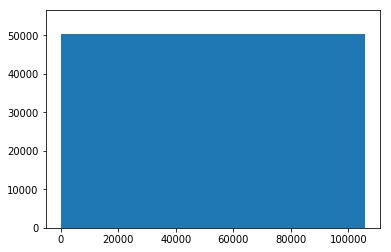

In [51]:
#Histograms by quartile
plt.hist(df.backers_count, bins = [0,3,25,81,105857])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

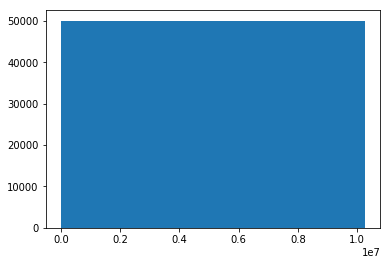

In [52]:
plt.hist(df.usd_pledged, bins = [0,100,1448,5884,10266845])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

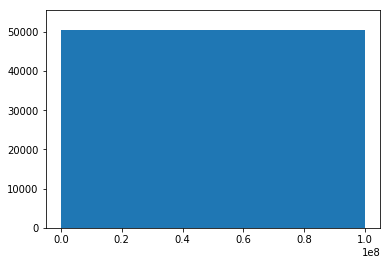

In [53]:
plt.hist(df.goal, bins = [0,1500,5000,12500,100000000])
plt.show

In [54]:
def plot_box_title(series):
    plt.boxplot(np.sqrt(df[series]), whis = 75)
    plt.title('square root of ' + series)
    plt.show()

In [55]:
def plot_hist_title(series):
    plt.hist(np.sqrt(df[series]), bins = 100, density = True)
    plt.title('square root of ' + series)
    plt.show()

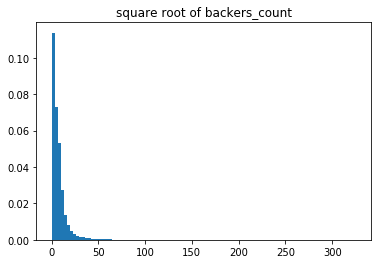

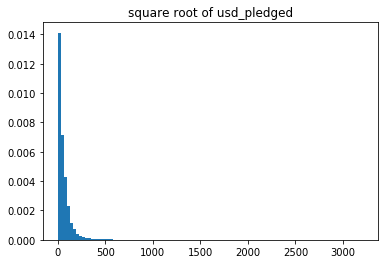

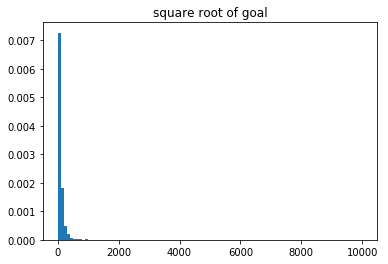

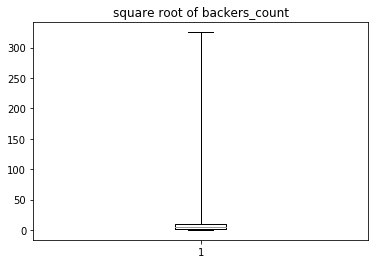

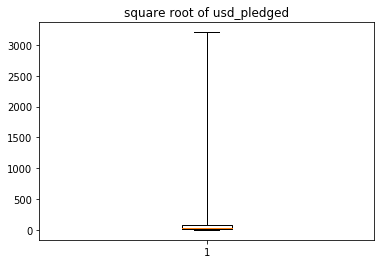

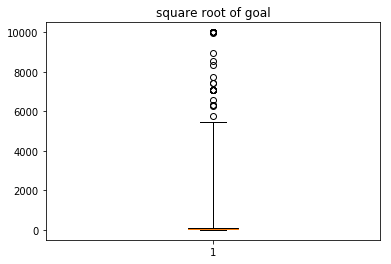

In [56]:
plot_hist_title('backers_count')
plot_hist_title('usd_pledged')
plot_hist_title('goal')
plot_box_title('backers_count')
plot_box_title('usd_pledged')
plot_box_title('goal')

In [57]:
#count number of objects above the third quartile
print(np.sum(df.backers_count > 81))
print(np.sum(df.usd_pledged > 5884))
print(np.sum(df.goal > 12500))
#count number of objects above significant declines in the histograms
print(np.sum(df.backers_count > 2500))
print(np.sum(df.usd_pledged > 2500000))
print(np.sum(df.goal > 10266845.74))

49857
49937
49796
1414
43
84


In [58]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 15)
df[df.goal == 100000000].head()

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,fx_rate,goal,id,is_starrable,launched_at,name,photo,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type,location,friends,is_backing,is_starred,permissions
9009,0,Fashion ill...,"{""urls"":{""w...",0,CA,2015-04-29 1...,"{""urls"":{""w...",CAD,$,True,USD,2015-06-30 1...,False,0.80,"100,000,000.00",1720842777,False,2015-05-01 1...,NAKED FASHI...,"{""small"":""h...",0.00,"{""backgroun...",naked-fashi...,https://www...,False,False,failed,2015-06-30 1...,0.83,"{""web"":{""pr...",0.00,domestic,"{""country"":...",NaN,NaN,NaN,NaN
43010,1,We are desi...,"{""urls"":{""w...",1,US,2015-01-01 1...,"{""urls"":{""w...",USD,$,True,USD,2015-03-02 0...,False,1.00,"100,000,000.00",601594365,False,2015-01-07 1...,The Multi-T...,"{""small"":""h...",1.00,"{""backgroun...",the-multi-t...,https://www...,False,False,canceled,2015-01-21 1...,1.00,"{""web"":{""pr...",1.00,domestic,"{""country"":...",NaN,NaN,NaN,NaN
61556,1,This is NOT...,"{""urls"":{""w...",0,CA,2014-11-01 1...,"{""urls"":{""w...",CAD,$,True,USD,2015-05-04 1...,False,0.80,"100,000,000.00",308045282,False,2015-03-05 1...,Jesus Priest,"{""small"":""h...",1.00,"{""backgroun...",jesus-priest,https://www...,False,False,failed,2015-05-04 1...,0.80,"{""web"":{""pr...",0.80,domestic,"{""country"":...",NaN,NaN,NaN,NaN
63189,0,This cartoo...,"{""urls"":{""w...",0,US,2015-02-08 0...,"{""urls"":{""w...",USD,$,True,USD,2015-04-11 1...,False,1.00,"100,000,000.00",962949560,False,2015-02-10 1...,"""PG"" Reanim...","{""small"":""h...",0.00,"{""backgroun...",pg-reanimat...,https://www...,False,False,failed,2015-04-11 1...,1.00,"{""web"":{""pr...",0.00,domestic,"{""country"":...",NaN,NaN,NaN,NaN
68293,0,A 2000 year...,"{""urls"":{""w...",0,GB,2015-10-29 1...,"{""urls"":{""w...",GBP,Â£,False,USD,2015-11-30 1...,False,1.40,"100,000,000.00",2000749004,False,2015-11-16 2...,A Celtic Lo...,"{""small"":""h...",0.00,"{""backgroun...",a-celtic-lo...,https://www...,False,False,failed,2015-11-30 1...,1.52,"{""web"":{""pr...",0.00,domestic,"{""country"":...",NaN,NaN,NaN,NaN


In [59]:
df['usd_goal'] = df.goal*df.static_usd_rate
df.usd_goal.describe()

count       199,704.00
mean         42,197.86
std       1,141,947.28
min               0.01
25%           1,500.00
50%           5,000.00
75%          12,122.60
max     152,350,076.00
Name: usd_goal, dtype: float64

In [60]:
print(df[df.usd_goal >= 100000000].shape)
pd.set_option('display.max_colwidth', 15)
df[df.usd_goal > 100000000].head()

(13, 38)


,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,fx_rate,goal,id,is_starrable,launched_at,name,photo,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type,location,friends,is_backing,is_starred,permissions,usd_goal
68293,0,A 2000 year...,"{""urls"":{""w...",0,GB,2015-10-29 1...,"{""urls"":{""w...",GBP,Â£,False,USD,2015-11-30 1...,False,1.40,"100,000,000.00",2000749004,False,2015-11-16 2...,A Celtic Lo...,"{""small"":""h...",0.00,"{""backgroun...",a-celtic-lo...,https://www...,False,False,failed,2015-11-30 1...,1.52,"{""web"":{""pr...",0.00,domestic,"{""country"":...",NaN,NaN,NaN,NaN,"152,350,076.00"
73225,2,Erlebe haut...,"{""urls"":{""w...",38,DE,2017-01-11 2...,"{""urls"":{""w...",EUR,â‚¬,False,USD,2017-03-14 1...,False,1.25,"100,000,000.00",2132015082,False,2017-01-13 1...,DER NEANDER...,"{""small"":""h...",36.00,"{""backgroun...",der-neander...,https://www...,False,False,failed,2017-03-14 1...,1.06,"{""web"":{""pr...",38.16,domestic,"{""country"":...",NaN,NaN,NaN,NaN,"105,999,014.00"
96985,0,My wife And...,"{""urls"":{""w...",0,CH,2015-08-01 0...,"{""urls"":{""w...",CHF,Fr,False,USD,2015-10-05 1...,False,1.08,"100,000,000.00",219702078,False,2015-08-06 1...,Kitchen fro...,"{""small"":""h...",0.00,"{""backgroun...",kitchen-fro...,https://www...,False,False,failed,2015-10-05 1...,1.02,"{""web"":{""pr...",0.00,domestic,"{""country"":...",NaN,NaN,NaN,NaN,"102,344,508.00"


In [61]:
pd.set_option('display.max_colwidth', -1)
df[df.usd_goal >= 100000000].urls

43010     {"web":{"project":"https://www.kickstarter.com/projects/2004926375/the-multi-trillion-dollar-dreamtm?ref=category_newest","rewards":"https://www.kickstarter.com/projects/2004926375/the-multi-trillion-dollar-dreamtm/rewards"}}                              
63189     {"web":{"project":"https://www.kickstarter.com/projects/805079035/pg-reanimated-cartoons?ref=category_newest","rewards":"https://www.kickstarter.com/projects/805079035/pg-reanimated-cartoons/rewards"}}                                                      
68293     {"web":{"project":"https://www.kickstarter.com/projects/245190432/a-celtic-lovestory?ref=category_newest","rewards":"https://www.kickstarter.com/projects/245190432/a-celtic-lovestory/rewards"}}                                                              
73215     {"web":{"project":"https://www.kickstarter.com/projects/universalechelon/the-throne-fall-of-lucifer?ref=category_newest","rewards":"https://www.kickstarter.com/projects/universalechelon/the-th

79


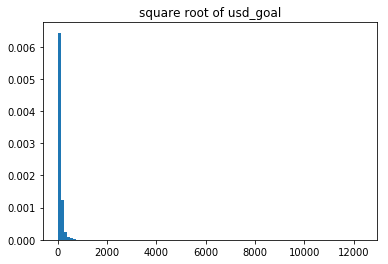

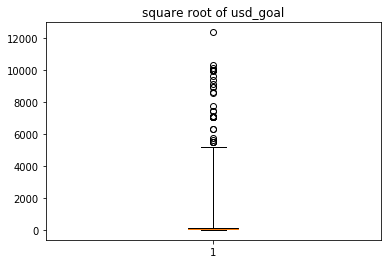

In [62]:
print(np.sum(df.usd_goal > 10266845.74))
plot_hist_title('usd_goal')
plot_box_title('usd_goal')

In [63]:
df = df[df.usd_goal < df.usd_pledged.max()]

In [64]:
print(df.info())
print()
df.columns


<class 'pandas.core.frame.DataFrame'>
Int64Index: 199625 entries, 0 to 199703
Data columns (total 38 columns):
backers_count               199625 non-null int64
blurb                       199613 non-null object
category                    199625 non-null object
converted_pledged_amount    199625 non-null int64
country                     199625 non-null object
created_at                  199625 non-null datetime64[ns]
creator                     199625 non-null object
currency                    199625 non-null object
currency_symbol             199625 non-null object
currency_trailing_code      199625 non-null bool
current_currency            199625 non-null object
deadline                    199625 non-null datetime64[ns]
disable_communication       199625 non-null bool
fx_rate                     199625 non-null float64
goal                        199625 non-null float64
id                          199625 non-null int64
is_starrable                199625 non-null bool
launched_at  

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'created_at', 'creator', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline',
       'disable_communication', 'fx_rate', 'goal', 'id', 'is_starrable',
       'launched_at', 'name', 'photo', 'pledged', 'profile', 'slug',
       'source_url', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'urls', 'usd_pledged', 'usd_type', 'location',
       'friends', 'is_backing', 'is_starred', 'permissions', 'usd_goal'],
      dtype='object')

In [65]:
#2 Check for duplicates
df = df.drop_duplicates()
print(df.info())
print(str(199625 - 195536))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195536 entries, 0 to 199703
Data columns (total 38 columns):
backers_count               195536 non-null int64
blurb                       195526 non-null object
category                    195536 non-null object
converted_pledged_amount    195536 non-null int64
country                     195536 non-null object
created_at                  195536 non-null datetime64[ns]
creator                     195536 non-null object
currency                    195536 non-null object
currency_symbol             195536 non-null object
currency_trailing_code      195536 non-null bool
current_currency            195536 non-null object
deadline                    195536 non-null datetime64[ns]
disable_communication       195536 non-null bool
fx_rate                     195536 non-null float64
goal                        195536 non-null float64
id                          195536 non-null int64
is_starrable                195536 non-null bool
launched_at  

### How big and diverse is Kickstarter?

How many countries?  22


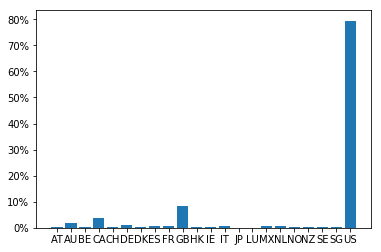

US   0.79
GB   0.08
CA   0.04
AU   0.02
DE   0.01
Name: country, dtype: float64
['US', 'GB', 'CA', 'AU', 'DE']


In [66]:
x = df['country'].value_counts().index
h = df['country'].value_counts(normalize = True)
print('How many countries? ', str(len(x)))
plt.bar(x, height = h)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.show()
top5 = df['country'].value_counts(normalize = True).head()
print(top5)
print(list(top5.index))

Index(['US', 'GB', 'Other', 'CA', 'AU', 'DE'], dtype='object')
US      0.79
GB      0.08
Other   0.06
CA      0.04
AU      0.02
DE      0.01
Name: country, dtype: float64


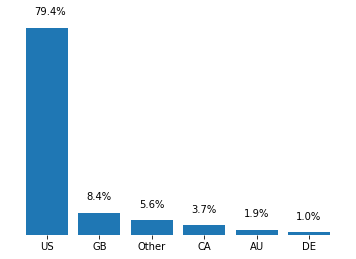

In [67]:
df.country = df.country.apply(lambda x: x if x in list(top5.index) else 'Other')
print(df.country.value_counts().index)
print(df.country.value_counts(normalize = True))
x = df.country.value_counts().index
h = df.country.value_counts(normalize = True)
fig, ax = plt.subplots()
ind = np.arange(len(x))
bars = ax.bar(ind, list(map(float,h)),tick_label = x)
ax.set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()], visible = False)
for bar in bars:
    ax.text(bar.get_x() + .15, bar.get_height() + .05, str('{:.1f}%'.format(bar.get_height()*100)))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()


## Unsurprisingly, the US is the country with the most projects, followed by Great Britain, Canada, Australia and Germany.  

In [68]:
#Get the categories and subcategories
def get_category(s):
    m = re.search('g":(.*)"',s)[0].split('/')
    cat = re.search('\w+',m[0].split(':')[1])
    return cat.group(0)

def get_subcategory(s):
    m = re.search('g":(.*)"',s)[0].split('/')
    if len(m) < 2:
        return 'undisclosed'
    else:
        sub = re.search('\w+',m[1])
    return sub.group(0)

df['cat'] = df['category'].apply(get_category)
df['sub_cat'] = df['category'].apply(get_subcategory)
print(df['cat'].value_counts())
df['cat'].value_counts(normalize = True)

music          26398
film           26160
technology     20252
art            19687
publishing     19135
food           15240
games          13659
fashion        8835 
design         8404 
comics         7983 
photography    7508 
crafts         6620 
theater        6332 
journalism     5445 
dance          3878 
Name: cat, dtype: int64


music         0.14
film          0.13
technology    0.10
art           0.10
publishing    0.10
food          0.08
games         0.07
fashion       0.05
design        0.04
comics        0.04
photography   0.04
crafts        0.03
theater       0.03
journalism    0.03
dance         0.02
Name: cat, dtype: float64

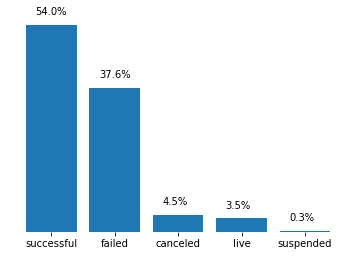

In [69]:
x = df.state.value_counts().index
h = df.state.value_counts(normalize = True)
fig, ax = plt.subplots()
ind = np.arange(len(x))
bars = ax.bar(ind, list(map(float,h)),tick_label = x)
ax.set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()], visible = False)
for bar in bars:
    ax.text(bar.get_x() + .15, bar.get_height() + .025, str('{:.1f}%'.format(bar.get_height()*100)))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()

### 54% of the projects succeed, while 42% fail or are canceled.

In [70]:
df['usd_pledged'].describe()

count   195,536.00   
mean    11,885.85    
std     91,964.47    
min     0.00         
25%     96.21        
50%     1,450.00     
75%     5,988.00     
max     10,266,845.74
Name: usd_pledged, dtype: float64

In [71]:
### Move this to a .py file

### Got this function from stack overflow to get rid of the outliers and improve visualizations:
def is_outlier(points, thresh = 3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

<function matplotlib.pyplot.show(*args, **kw)>

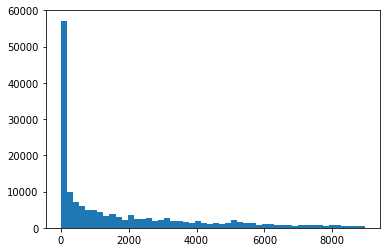

In [72]:
plt.hist(df.usd_pledged[~is_outlier(df.usd_pledged)], bins = 50)
plt.show

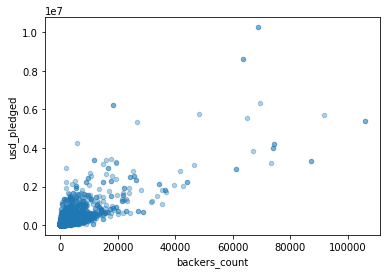

In [73]:
df.plot.scatter(x = 'backers_count', y = 'usd_pledged', alpha = 0.35)

### Paul: "I know that the project goal has a strong effect on donations (people are less likely to donate once the goal is reached) so that might have a ceiling effect that's worth depicting in some way."

count   195,536.00   
mean    24,608.38    
std     199,952.41   
min     0.01         
25%     1,561.49     
50%     5,000.00     
75%     12,500.00    
max     10,000,000.00
Name: usd_goal, dtype: float64


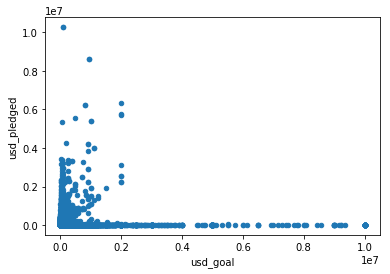

In [75]:
print(df.usd_goal.describe())
df.plot.scatter(x = 'usd_goal', y = 'usd_pledged')

### Weird result, it's worth normalizing and seeing the distribution.

count   189,607.00
mean    0.81      
std     0.86      
min     0.00      
25%     0.02      
50%     1.00      
75%     1.17      
max     5.16      
Name: pct_acc_goal, dtype: float64


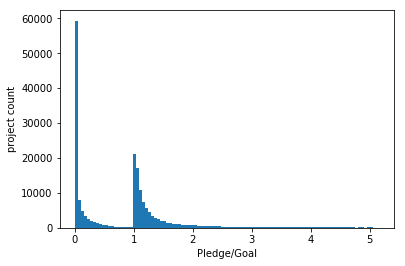

In [77]:
df['pct_acc_goal'] = df['usd_pledged']/df['usd_goal']
print(df.pct_acc_goal[~is_outlier(df.pct_acc_goal)].describe())
plt.hist(df.pct_acc_goal[~is_outlier(df.pct_acc_goal)], bins = 100)
plt.ylabel('project count')
plt.xlabel('Pledge/Goal')
plt.show()

### The median project gets exactly their goal, but there are big outliers that push the mean even higher. It would be interesting to see this result by state of the project. That is, many projects are concentrated around zero, which are likely to have failed, while the other mode is in one, which should be correlated with succesful projects. 

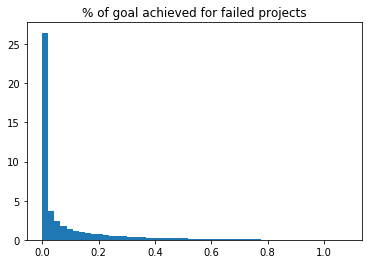

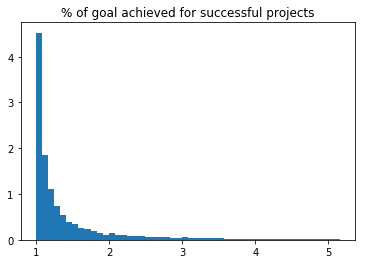

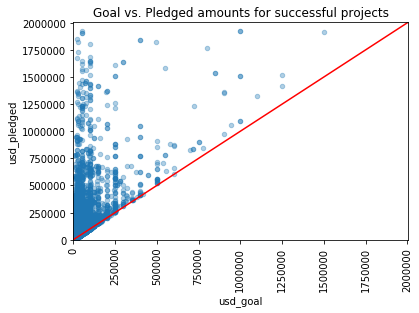

In [78]:
plt.hist(df.pct_acc_goal[~is_outlier(df.pct_acc_goal)][df.state == 'failed'], bins = 50, density = True)
plt.title('% of goal achieved for failed projects')
plt.show()
plt.hist(df.pct_acc_goal[~is_outlier(df.pct_acc_goal)][df.state == 'successful'], bins = 50, density = True)
plt.title('% of goal achieved for successful projects')
plt.show()
x = df[df.state == 'successful']
lineStart = x.usd_goal.min() 
lineEnd = x.usd_goal.max()  
x.plot.scatter(x = 'usd_goal', y = 'usd_pledged', alpha = 0.35)
plt.xticks(rotation='vertical')
plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r')
plt.xlim(lineStart, lineEnd)
plt.ylim(lineStart, lineEnd)
plt.title('Goal vs. Pledged amounts for successful projects')
plt.show()

In [79]:
df[df.state == 'successful'].pct_acc_goal.describe()

count   105,680.00
mean    6.41      
std     259.75    
min     1.00      
25%     1.05      
50%     1.16      
75%     1.59      
max     41,535.01 
Name: pct_acc_goal, dtype: float64

### After cleaning outliers, and focusing on sucessful projects we can see that most succesful projects get much more pledged capital than what they need. This points to certain motivations beyond making the project viable.

count   174,742.00
mean    78.49     
std     139.12    
min     0.46      
25%     29.24     
50%     51.55     
75%     88.29     
max     10,000.00 
Name: avg_pledge, dtype: float64


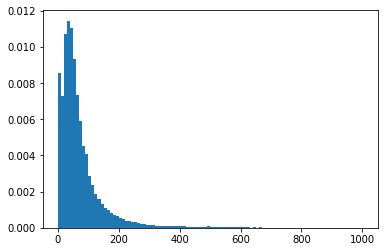

In [80]:
df['avg_pledge'] = df['usd_pledged']/df['backers_count']
print(df['avg_pledge'].describe())
plt.hist(df.avg_pledge[df.avg_pledge < 1000], bins = 100, density = True)
plt.show()

### When veryfying each projects have the highest average pledge, we realize that technology shows up between the best:

c:\users\sm_fe\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


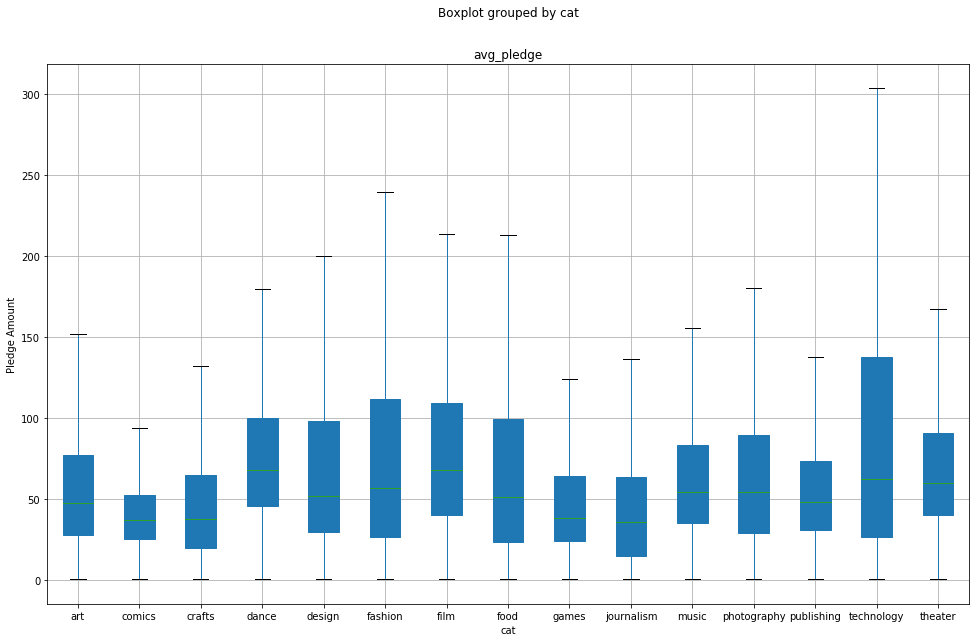

In [81]:
fig3, ax3 = plt.subplots(figsize=(16,10))

ax3.set_xlabel('Categories')
ax3.set_ylabel('Pledge Amount')

df.boxplot(column = ['avg_pledge'], by = 'cat', ax = ax3, showfliers=False, patch_artist=True)


In [82]:
df.groupby('cat').backers_count.describe()

,count,mean,std,min,25%,50%,75%,max
cat,,,,,,,,
art,"19,687.00",48.53,222.49,0.00,3.00,17.00,48.00,"22,840.00"
comics,"7,983.00",178.08,446.20,0.00,22.00,65.00,167.00,"14,952.00"
crafts,"6,620.00",44.92,196.84,0.00,2.00,8.00,36.00,"12,705.00"
dance,"3,878.00",53.32,90.37,0.00,17.00,37.00,67.00,"4,133.00"
design,"8,404.00",371.43,"1,474.89",0.00,10.00,69.00,277.00,"68,929.00"
fashion,"8,835.00",93.36,397.59,0.00,2.00,13.00,64.00,"13,363.00"
film,"26,160.00",92.13,801.37,0.00,3.00,24.00,70.00,"91,585.00"
food,"15,240.00",62.68,201.29,0.00,1.00,7.00,59.00,"10,293.00"
games,"13,659.00",571.35,"2,962.35",0.00,7.00,74.00,311.50,"87,142.00"


c:\users\sm_fe\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


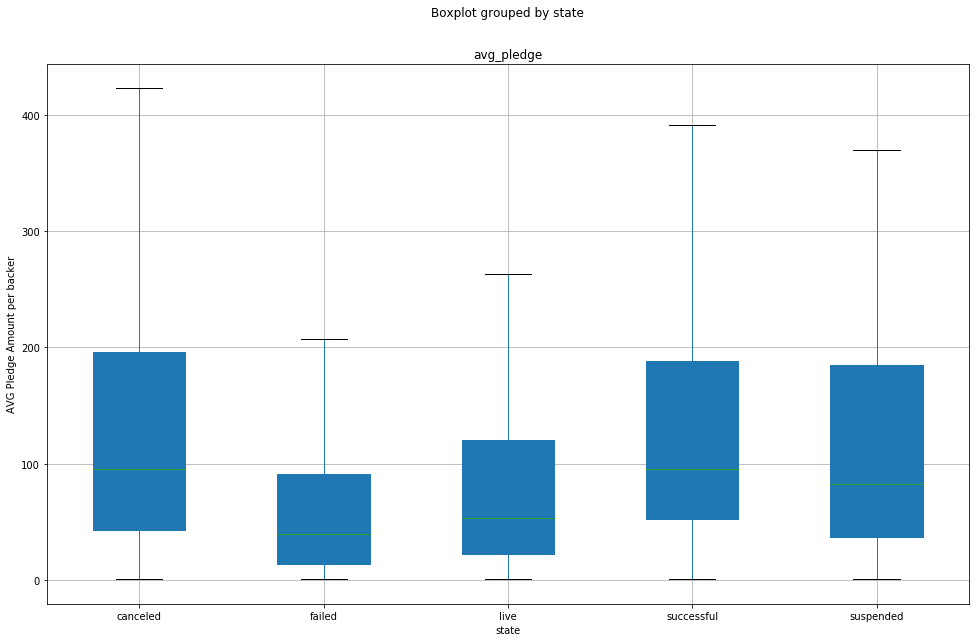

In [83]:
fig4, ax4 = plt.subplots(figsize=(16,10))

ax4.set_xlabel('Technology States')
ax4.set_ylabel('AVG Pledge Amount per backer')

df[df.cat == 'technology'].boxplot(column = ['avg_pledge'], by = 'state', ax = ax4, showfliers=False, patch_artist=True)

c:\users\sm_fe\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


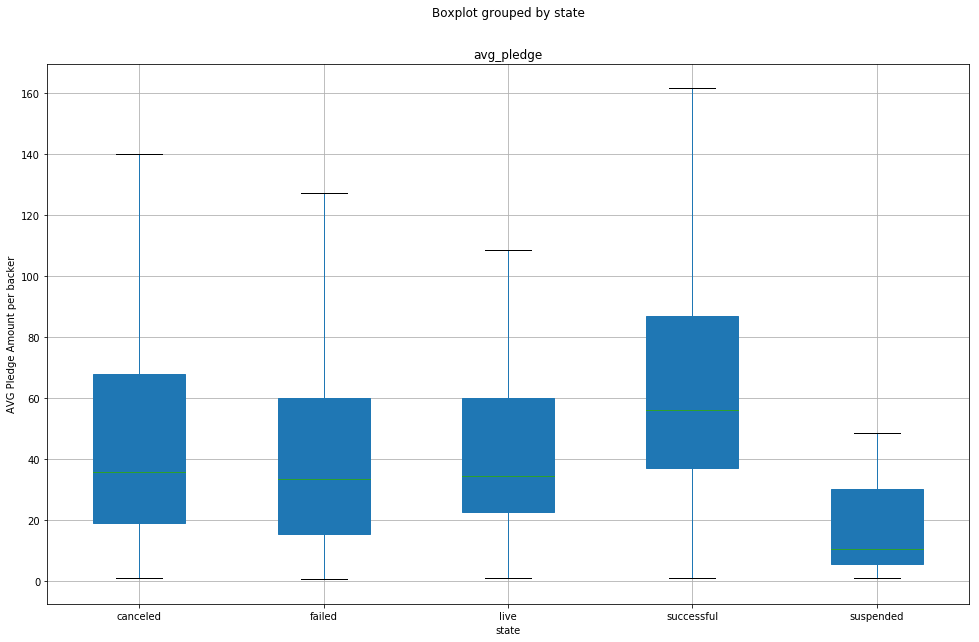

In [84]:
fig5, ax5 = plt.subplots(figsize=(16,10))

ax5.set_xlabel('Technology States')
ax5.set_ylabel('AVG Pledge Amount per backer')

df[df.cat == 'art'].boxplot(column = ['avg_pledge'], by = 'state', ax = ax5, showfliers=False, patch_artist=True)

# Data analysis by state of the project

In [85]:
def head_categories(state):
    h = df[df.state == state]
    print(h['cat'].value_counts().head(5))
    print()
    print(h['cat'].value_counts(normalize = True).head(5))

In [86]:
print("Top 5 categories in Successful:")
head_categories('successful')
print("\nTop 5 categories in Canceled:")
head_categories('canceled')
print("\nTop 5 categories in Failed:")
head_categories('failed')

Top 5 categories in Successful:
music         17112
film          14734
publishing    12828
art           10315
games         7850 
Name: cat, dtype: int64

music        0.16
film         0.14
publishing   0.12
art          0.10
games        0.07
Name: cat, dtype: float64

Top 5 categories in Canceled:
film          1441
food          938 
games         900 
technology    769 
music         757 
Name: cat, dtype: int64

film         0.16
food         0.11
games        0.10
technology   0.09
music        0.09
Name: cat, dtype: float64

Top 5 categories in Failed:
technology    11344
film          9127 
food          8781 
art           8121 
music         7923 
Name: cat, dtype: int64

technology   0.15
film         0.12
food         0.12
art          0.11
music        0.11
Name: cat, dtype: float64


### This is very interesting, even though they make nearly 10% of Kickstarter projects, technology projects fail the most.

In [87]:
print(df[df.state == 'failed'][df.cat == 'technology'].sub_cat.value_counts().head())
print()
df[df.state == 'failed'][df.cat == 'technology'].sub_cat.value_counts(normalize = True).head()

web         2089
software    1979
apps        1899
gadgets     1459
hardware    1135
Name: sub_cat, dtype: int64



c:\users\sm_fe\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
c:\users\sm_fe\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


web        0.18
software   0.17
apps       0.17
gadgets    0.13
hardware   0.10
Name: sub_cat, dtype: float64

### It would seem that software is most likely to fail than hardware, which would suggest some preference for orthodox inventors.

In [88]:
print(df[df.state == 'successful'][df.cat == 'technology'].sub_cat.value_counts().head())
print()
df[df.state == 'successful'][df.cat == 'technology'].sub_cat.value_counts(normalize = True).head()

hardware       1845
gadgets        969 
software       571 
undisclosed    566 
diy            519 
Name: sub_cat, dtype: int64



c:\users\sm_fe\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
c:\users\sm_fe\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


hardware      0.25
gadgets       0.13
software      0.08
undisclosed   0.08
diy           0.07
Name: sub_cat, dtype: float64

In [89]:
state_subcat = pd.crosstab(df[df.cat == 'technology'].sub_cat,df.state).apply(lambda x: 100*x/x.sum(), axis=1)
state_subcat = state_subcat.sort_values('successful', ascending =  False)
pd.options.display.float_format = '{:.1f}%'.format
state_subcat

state,canceled,failed,live,successful,suspended
sub_cat,,,,,
undisclosed,0.0%,0.0%,10.0%,90.0%,0.0%
hardware,0.0%,37.2%,2.4%,60.5%,0.0%
camera,10.3%,34.9%,1.7%,50.5%,2.5%
diy,9.0%,38.0%,2.5%,50.2%,0.3%
robots,10.2%,41.2%,3.0%,44.4%,1.2%
sound,12.9%,37.9%,4.4%,43.7%,1.2%
space,7.6%,44.6%,2.2%,43.5%,2.2%
3d,12.1%,44.1%,1.8%,40.2%,1.8%
gadgets,0.0%,58.0%,3.5%,38.5%,0.0%


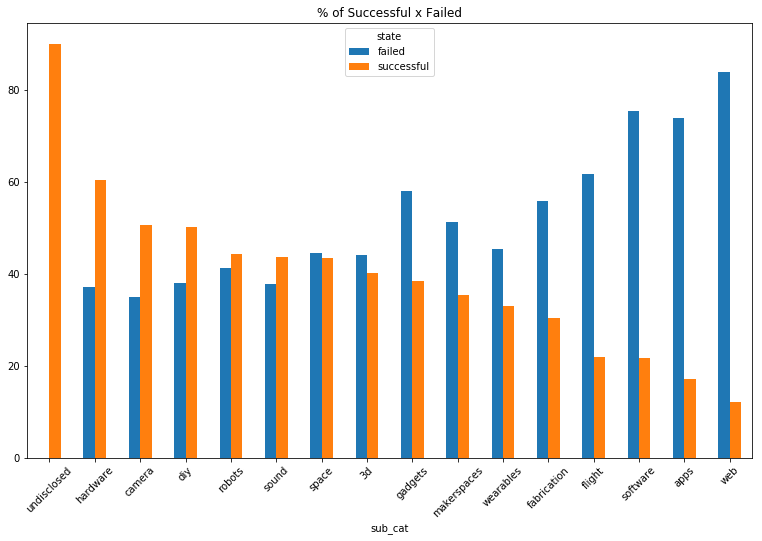

In [90]:
state_subcat = state_subcat.drop(['live','suspended','canceled'], axis = 1)
state_subcat.plot(kind = 'bar', title = '% of Successful x Failed', figsize = (13,8), rot = 45)
plt.show()

In [91]:
print(df[df.state == 'successful'][df.cat == 'technology'][df.sub_cat == 'undisclosed'].urls.head())

171982    {"web":{"project":"https://www.kickstarter.com/projects/ashleighwolfe/perths-urban-reptile-ecology-tracking-reptiles-in?ref=category_newest","rewards":"https://www.kickstarter.com/projects/ashleighwolfe/perths-urban-reptile-ecology-tracking-reptiles-in/rewards"}}
171986    {"web":{"project":"https://www.kickstarter.com/projects/1308642275/digitsole-the-first-interactive-insole-to-heat-you?ref=category_newest","rewards":"https://www.kickstarter.com/projects/1308642275/digitsole-the-first-interactive-insole-to-heat-you/rewards"}}    
171992    {"web":{"project":"https://www.kickstarter.com/projects/1771876920/oar-inspired-performance-measurement-solution?ref=category_newest","rewards":"https://www.kickstarter.com/projects/1771876920/oar-inspired-performance-measurement-solution/rewards"}}              
171996    {"web":{"project":"https://www.kickstarter.com/projects/107521314/holy-pie-smart-racket-for-badminton-and-tennis?ref=category_newest","rewards":"https://www.kickstarter

c:\users\sm_fe\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


### And it would seem that orthodox inventors get the most success in the technology sector in Kickstarter. 

# Talking to a friend of mine he suggested that technology projects were most expensive to make and thus more likely to not reach their goals. This section responds to that concern.

In [92]:
pd.options.display.float_format = '{:,.1f}'.format
print(df['usd_goal'].describe())

count   195,536.0   
mean    24,608.4    
std     199,952.4   
min     0.0         
25%     1,561.5     
50%     5,000.0     
75%     12,500.0    
max     10,000,000.0
Name: usd_goal, dtype: float64


In [93]:
ranges = [0,1000,2500,10000,50000,100000]
labels = ['Tiny','Small','Medium','Large','Huge']
df['goal_size'] = pd.cut(df.usd_goal, ranges, labels=labels).astype('category')

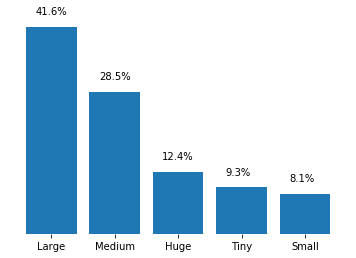

In [94]:
by_cat = df.groupby('cat')
tech = by_cat.get_group('technology')
x = tech['goal_size'].value_counts().index
h = tech['goal_size'].value_counts(normalize = True)
fig, ax = plt.subplots()
ind = np.arange(len(x))
bars = ax.bar(ind, list(map(float,h)),tick_label = x)
ax.set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()], visible = False)
for bar in bars:
    ax.text(bar.get_x() + .15, bar.get_height() + .025, str('{:.1f}%'.format(bar.get_height()*100)))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()

### So, more than half of the projects in tech ask for more than 10 thousand dollars, with 12% of them asking for more than 50 thousand dollars.

### Let's see the results for the most sucessful category: Music

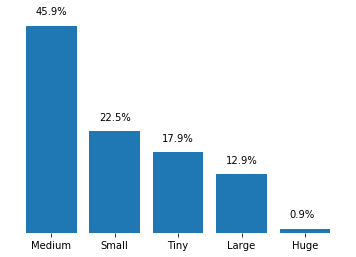

In [95]:
music = by_cat.get_group('music')
x = music['goal_size'].value_counts().index
h = music['goal_size'].value_counts(normalize = True)
fig, ax = plt.subplots()
ind = np.arange(len(x))
bars = ax.bar(ind, list(map(float,h)),tick_label = x)
ax.set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()], visible = False)
for bar in bars:
    ax.text(bar.get_x() + .15, bar.get_height() + .025, str('{:.1f}%'.format(bar.get_height()*100)))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()

### Less than 15% of music projects ask for more than 10k, which makes them easier to back.

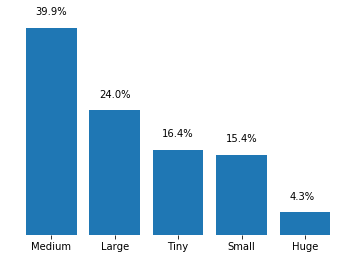

In [96]:
film = by_cat.get_group('film')
x = film['goal_size'].value_counts().index
h = film['goal_size'].value_counts(normalize = True)
fig, ax = plt.subplots()
ind = np.arange(len(x))
bars = ax.bar(ind, list(map(float,h)),tick_label = x)
ax.set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()], visible = False)
for bar in bars:
    ax.text(bar.get_x() + .15, bar.get_height() + .025, str('{:.1f}%'.format(bar.get_height()*100)))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()

In [97]:
print(film.usd_goal.describe())
print(tech.usd_goal.describe())

count   26,160.0    
mean    43,357.2    
std     348,203.1   
min     0.6         
25%     2,000.0     
50%     5,000.0     
75%     15,000.0    
max     10,000,000.0
Name: usd_goal, dtype: float64
count   20,252.0    
mean    55,276.2    
std     289,860.7   
min     0.7         
25%     5,000.0     
50%     15,368.4    
75%     49,450.8    
max     10,000,000.0
Name: usd_goal, dtype: float64


cat
art           12,799.8
comics        7,563.0 
crafts        8,656.5 
dance         7,589.4 
design        31,051.1
fashion       16,712.4
film          43,357.2
food          38,272.8
games         27,966.6
journalism    25,302.0
music         9,175.6 
photography   11,500.0
publishing    9,659.7 
technology    55,276.2
theater       21,161.7
Name: usd_goal, dtype: float64


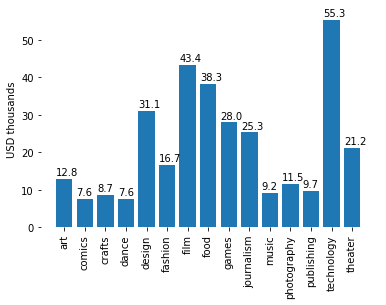

In [98]:
print(by_cat.usd_goal.mean())
x = by_cat.usd_goal.mean().index
h = by_cat.usd_goal.mean().values/1000
fig, ax = plt.subplots()
ind = np.arange(len(x))
bars = ax.bar(ind, list(map(float,h)),tick_label = x)
#ax.set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()], visible = False)
plt.xticks(rotation='vertical')
plt.ylabel('USD thousands')
for bar in bars:
    ax.text(bar.get_x(), bar.get_height() + 1, str('{:.1f}'.format(bar.get_height())))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
#plt.gca().axes.get_yaxis().set_visible(False)
plt.show()

### Let's see the success rate by category and goal to get a sense of this.

In [99]:
df['successful'] = df['state'].apply(lambda x: 100 if x == 'successful' else 0)

In [100]:
table = pd.pivot_table(df, values = 'successful', index = 'cat', columns = 'goal_size')
print('Success rate by category and size of goal')
pd.options.display.float_format = '{:.1f}%'.format
table

Success rate by category and size of goal


goal_size,Tiny,Small,Medium,Large,Huge
cat,,,,,
art,62.8%,60.6%,49.1%,30.9%,14.4%
comics,81.9%,74.7%,68.3%,59.1%,31.0%
crafts,61.7%,43.0%,36.2%,26.7%,7.9%
dance,84.4%,87.2%,82.8%,65.0%,10.5%
design,62.9%,58.1%,66.9%,65.0%,50.2%
fashion,51.8%,39.2%,37.8%,39.8%,10.9%
film,65.5%,67.6%,61.9%,47.7%,26.2%
food,40.5%,44.3%,40.5%,30.0%,7.3%
games,67.4%,61.7%,58.2%,52.6%,44.1%


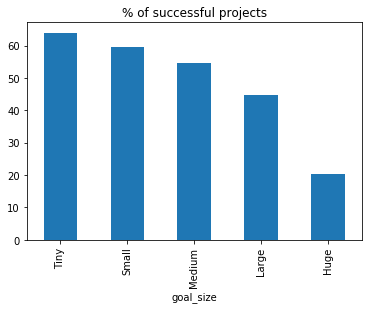

In [101]:
table.mean(axis = 0).plot(kind = 'bar', title = '% of successful projects')

### The inflated rate of failure of technology is due to the fact that most of their projects ask for more than 10k, i.e., they're more expensive to develop and have a higher natural cutoff. In fact, the success rate for huge projects is higher than the average.

## This is also true for the subcategories inside technology.

In [102]:
by_cat = df.groupby('cat')
tech = by_cat.get_group('technology')
table = pd.pivot_table(tech, values = 'successful', index = 'sub_cat', columns = 'goal_size')
print('Success rate by subcategory in tech and size of goal')
table

Success rate by subcategory in tech and size of goal


goal_size,Tiny,Small,Medium,Large,Huge
sub_cat,,,,,
3d,53.3%,34.9%,37.3%,44.4%,43.4%
apps,35.8%,26.9%,21.0%,14.3%,3.1%
camera,75.0%,56.5%,43.8%,52.1%,57.7%
diy,75.1%,57.4%,49.1%,42.7%,23.3%
fabrication,63.2%,42.9%,29.9%,27.4%,37.8%
flight,40.5%,21.6%,23.6%,22.8%,15.0%
gadgets,61.8%,56.5%,46.0%,37.5%,27.1%
hardware,83.3%,79.0%,67.3%,57.0%,54.9%
makerspaces,68.2%,35.0%,46.4%,32.7%,5.0%


### Starred projects

In [103]:
print(df.is_starred.value_counts())
starred = df[df.is_starred != None]
pd.options.display.float_format = '{:,.1f}'.format
starred.describe()

False    168
Name: is_starred, dtype: int64


,backers_count,converted_pledged_amount,fx_rate,goal,id,pledged,static_usd_rate,usd_pledged,usd_goal,pct_acc_goal,avg_pledge,successful
count,"195,536.0","195,536.0","195,536.0","195,536.0","195,536.0","195,536.0","195,536.0","195,536.0","195,536.0","195,536.0","174,742.0","195,536.0"
mean,144.7,"11,883.9",1.0,"28,037.6","1,075,167,608.9","13,031.5",1.0,"11,885.9","24,608.4",3.6,78.5,54.0
std,"1,055.0","91,986.0",0.2,"347,321.6","619,069,722.4","140,952.2",0.2,"91,964.5","199,952.4",191.2,139.1,49.8
min,0.0,0.0,0.0,0.0,"18,520.0",0.0,0.0,0.0,0.0,0.0,0.5,0.0
25%,3.0,96.0,1.0,"1,500.0","538,088,760.5",100.0,1.0,96.2,"1,561.5",0.0,29.2,0.0
50%,25.0,"1,450.0",1.0,"5,000.0","1,079,688,238.0","1,450.0",1.0,"1,450.0","5,000.0",1.0,51.5,100.0
75%,82.0,"5,985.0",1.0,"13,000.0","1,609,188,999.5","6,025.0",1.0,"5,988.0","12,500.0",1.2,88.3,100.0
max,"105,857.0","10,266,845.0",1.8,"100,000,000.0","2,147,476,221.0","29,021,909.0",1.7,"10,266,845.7","10,000,000.0","41,535.0","10,000.0",100.0


# Concluding notes

### The data analysis for this dataset of kickstarter project has many interesting insights. 
First, Kickstarter opened a new space for people with no access to traditional funding to get resources for their projects. The results show a bias in traditional funding against artists, which in response, flocked to Kickstarter and made three quarters of the available projects (90% if you count food and games). 

Second, one would think that once the goal is reached people stop contributing to the campaign. But this should be seen in the context of the campaigns. Art projects are not looking to be viable in the business sense of the word, and thus, most of the backers have a more altruistic approach, giving more than the project's goal.

Third, technological projects fail the most even though they make a minority of the platforms projects. One part of the explanation is that technology has more access to traditional funding channels, which means that many projects reach kickstarter after being rejected by financial establishments. However, this study suggests that a big part of failure is structural: bigger projects tend to fail and most projects in technology are bigger than the average. In fact, subcategories from technology have great rates of success for tiny and small projects.

Thus, if you were trying to get the best use of the platform you should try artistic projects that need less than 10k. For other interests, finding a viable business model should be enough for getting traditional financial backing for smaller technology projects, and a requirement for bigger ones. 

### BCI Pitch

### How many projects in Florida did not receive financing and were larger than 10k?

In [104]:
df.location.head()

0    {"country":"US","urls":{"web":{"discover":"https://www.kickstarter.com/discover/places/paonia-co","location":"https://www.kickstarter.com/locations/paonia-co"},"api":{"nearby_projects":"https://api.kickstarter.com/v1/discover?signature=1518753993.05a59c69a5b76a1e1c451c4b1bc0c8b5cf840cc7&woe_id=2468066"}},"name":"Paonia","displayable_name":"Paonia, CO","short_name":"Paonia, CO","id":2468066,"state":"CO","type":"Town","is_root":false,"slug":"paonia-co","localized_name":"Paonia"}                                   
1    {"country":"US","urls":{"web":{"discover":"https://www.kickstarter.com/discover/places/bakersfield-ca","location":"https://www.kickstarter.com/locations/bakersfield-ca"},"api":{"nearby_projects":"https://api.kickstarter.com/v1/discover?signature=1518753980.64bc28ccbbd8bafb6f60a6e3619e53d837b5624c&woe_id=2358492"}},"name":"Bakersfield","displayable_name":"Bakersfield, CA","short_name":"Bakersfield, CA","id":2358492,"state":"CA","type":"Town","is_root":false,"slug":"bake

In [121]:
#Get the state
def get_us_state(s):
    try:
        m = re.search('"state":"\w+",',s)[0].split('"')
        us_state = m[3]
        return us_state
    except TypeError:
        return ""

df.us_state = df.location.apply(get_us_state)
florida = df[df.us_state == 'FL']
florida.describe()

,backers_count,converted_pledged_amount,fx_rate,goal,id,pledged,static_usd_rate,usd_pledged,usd_goal,pct_acc_goal,avg_pledge,successful
count,"6,928.0","6,928.0","6,928.0","6,928.0","6,928.0","6,928.0","6,928.0","6,928.0","6,928.0","6,928.0","5,774.0","6,928.0"
mean,79.8,"7,158.3",1.0,"25,962.8","1,073,360,125.7","7,162.8",1.0,"7,158.7","25,973.6",1.9,69.4,37.5
std,588.6,"82,675.4",0.0,"170,036.3","617,344,761.4","82,675.5",0.0,"82,675.4","170,118.4",62.1,129.8,48.4
min,0.0,0.0,0.1,1.0,"538,104.0",0.0,0.1,0.0,1.0,0.0,0.8,0.0
25%,1.0,10.0,1.0,"1,584.8","548,021,324.0",10.0,1.0,10.0,"1,584.8",0.0,21.0,0.0
50%,8.0,340.0,1.0,"5,000.0","1,074,084,223.0",340.0,1.0,340.0,"5,000.0",0.1,43.1,0.0
75%,42.0,"2,860.8",1.0,"15,000.0","1,600,596,208.5","2,866.2",1.0,"2,860.8","15,000.0",1.1,77.6,100.0
max,"26,828.0","5,333,792.0",1.4,"10,000,000.0","2,147,330,576.0","5,333,792.8",1.7,"5,333,792.8","10,000,000.0","4,684.0","5,000.5",100.0


In [129]:
florida_tech_failed = florida[florida.cat == 'technology'][florida.state == 'failed']
florida_tech_failed.describe()

c:\users\sm_fe\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,backers_count,converted_pledged_amount,fx_rate,goal,id,pledged,static_usd_rate,usd_pledged,usd_goal,pct_acc_goal,avg_pledge,successful
count,578.0,578.0,578.0,578.0,578.0,578.0,578.0,578.0,578.0,578.0,461.0,578.0
mean,22.4,"2,075.0",1.0,"51,863.1","1,067,875,356.4","2,074.3",1.0,"2,075.0","51,873.7",0.1,67.6,0.0
std,131.3,"9,362.3",0.0,"117,563.8","619,073,307.0","9,362.2",0.0,"9,362.3","117,565.7",0.1,127.2,0.0
min,0.0,0.0,1.0,10.0,"1,473,252.0",0.0,1.0,0.0,10.0,0.0,1.0,0.0
25%,1.0,2.0,1.0,"7,000.0","553,165,200.2",2.0,1.0,2.0,"7,000.0",0.0,9.3,0.0
50%,3.0,51.0,1.0,"20,000.0","1,059,908,989.0",51.0,1.0,51.0,"20,000.0",0.0,29.6,0.0
75%,9.0,497.0,1.0,"50,000.0","1,600,415,488.5",497.0,1.0,497.0,"50,000.0",0.0,70.0,0.0
max,"2,620.0","109,308.0",1.4,"1,200,000.0","2,141,585,021.0","109,308.0",1.6,"109,308.0","1,200,000.0",0.9,"1,444.6",0.0


In [116]:
florida_by_size.get_group('Large').urls.head()

175680    {"web":{"project":"https://www.kickstarter.com/projects/1090911217/apple-watch-crown-0?ref=category_newest","rewards":"https://www.kickstarter.com/projects/1090911217/apple-watch-crown-0/rewards"}}                                                            
175692    {"web":{"project":"https://www.kickstarter.com/projects/1090911217/apple-watch-crown?ref=category_newest","rewards":"https://www.kickstarter.com/projects/1090911217/apple-watch-crown/rewards"}}                                                                
175702    {"web":{"project":"https://www.kickstarter.com/projects/142937399/daisy-fit-project-breast-prostheses?ref=category_newest","rewards":"https://www.kickstarter.com/projects/142937399/daisy-fit-project-breast-prostheses/rewards"}}                              
175745    {"web":{"project":"https://www.kickstarter.com/projects/1484352170/my-stem-kits-k-12-curriculum-and-kits?ref=category_newest","rewards":"https://www.kickstarter.com/projects/1484352170/m

In [128]:
table = pd.pivot_table(florida_tech_failed, values = 'usd_goal', index = 'sub_cat', columns = 'goal_size', aggfunc = len)
table

goal_size,Tiny,Small,Medium,Large,Huge
sub_cat,,,,,
3d,nan,nan,4.0,9.0,5.0
apps,4.0,4.0,33.0,49.0,9.0
camera,nan,nan,1.0,3.0,nan
diy,1.0,3.0,5.0,6.0,3.0
fabrication,nan,nan,4.0,nan,nan
flight,1.0,1.0,1.0,5.0,1.0
gadgets,2.0,5.0,14.0,36.0,11.0
hardware,1.0,3.0,17.0,18.0,10.0
makerspaces,nan,1.0,1.0,nan,1.0
